In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import scipy as sc
from kafe2 import *
from uncertainties import ufloat
from uncertainties import unumpy as unp

# Aufgabe 1: Einführung


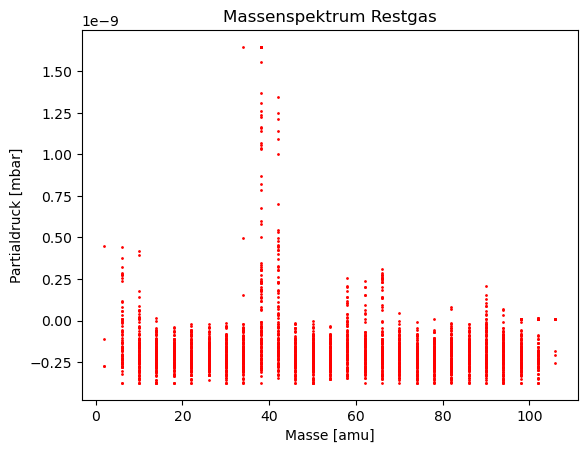

In [2]:
# plotten des Restgasspektrums
rg_1 = pd.read_csv('Data/Restgas(1-50).CSV', skiprows=15)
rg_2 = pd.read_csv('Data/Restgas(1-100).CSV', skiprows=15)

rg_m_1 = np.array(rg_1['CH1'])[200:1832] 
rg_p_1 = np.array(rg_1['CH2'])[200:1832] * 10 ** -10

rg_m_2 = np.array(rg_2['CH1'])[195:1820] 
rg_p_2 = np.array(rg_2['CH2'])[195:1820] * 10 ** -10

rg_m = np.concatenate((rg_m_1, rg_m_2))
rg_p = np.concatenate((rg_p_1, rg_p_2))

plt.plot(rg_m,rg_p,'r.', markersize=2)

plt.xlabel('Masse [amu]')
plt.ylabel('Partialdruck [mbar]')
plt.title('Massenspektrum Restgas')

plt.show()

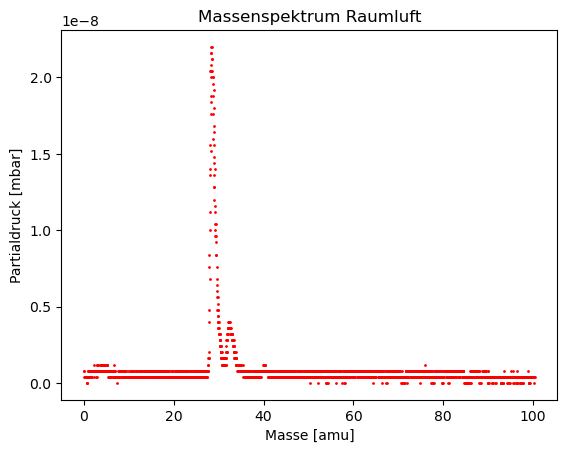

In [3]:
# plotten des Luftspektrums
air_1 = pd.read_csv('Data/Raumluft(1-50).CSV', skiprows=15)
air_2 = pd.read_csv('Data/Raumluft(50-100).CSV', skiprows=15)

air_m_1 = np.array(air_1['CH1'])[200:1807] / 2
air_p_1 = np.array(air_1['CH2'])[200:1807] * 10 ** -9

air_m_2 = np.array(air_2['CH1'])[207:1815] / 2 + 50
air_p_2 = np.array(air_2['CH2'])[207:1815] * 10 ** -9

air_m = np.concatenate((air_m_1, air_m_2))
air_p = np.concatenate((air_p_1, air_p_2))

plt.plot(air_m, air_p, 'r.', markersize=2)

plt.xlabel('Masse [amu]')
plt.ylabel('Partialdruck [mbar]')
plt.title('Massenspektrum Raumluft')

plt.show()

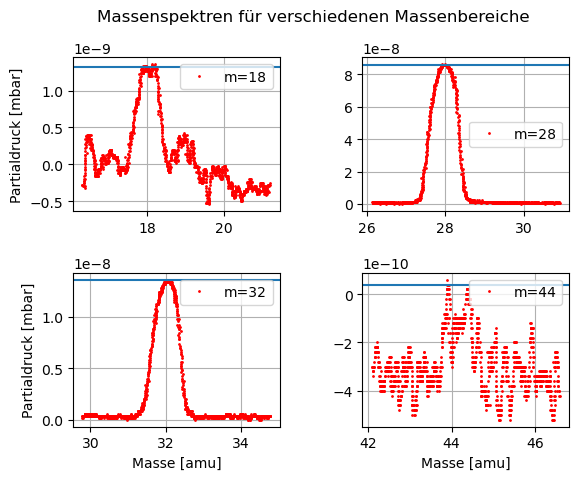

1.32e-09
8.56e-08
1.3600000000000001e-08
4.0000000000000004e-11


In [195]:
# plotten der einzelnen Linien in genauerer Betrachtung
m18 = pd.read_csv('Data/Raumluft_MS18.CSV', skiprows=15)
m28 = pd.read_csv('Data/Raumluft_MS28.CSV', skiprows=15)
m32 = pd.read_csv('Data/Raumluft_MS32.CSV', skiprows=15)
m44 = pd.read_csv('Data/Raumluft_MS44.CSV', skiprows=15)

m18_m = m18['CH1'][90:1700] / 20 + 16
m18_p = m18['CH2'][90:1700] * 10 ** -10

m28_m = m28['CH1'][150:1720] / 20 + 26
m28_p = m28['CH2'][150:1720] * 10 ** -9

m32_m = m32['CH1'][150:1780] / 20 + 30
m32_p = m32['CH2'][150:1780] * 10 ** -9

m44_m = m44['CH1'][120:1600] / 20 + 42
m44_p = m44['CH2'][120:1600] * 10 ** -10

fig, ax = plt.subplots(2,2, gridspec_kw={'wspace':0.4,'hspace':0.4})

ax[0][0].plot(m18_m + 0.25, m18_p, 'r.', markersize=2, label='m=18')
ax[0][1].plot(m28_m - 0.1, m28_p, 'r.', markersize=2, label='m=28')
ax[1][0].plot(m32_m - 0.25, m32_p, 'r.', markersize=2, label='m=32')
ax[1][1].plot(m44_m, m44_p, 'r.', markersize=2, label='m=44')

fig.suptitle('Massenspektren für verschiedenen Massenbereiche')

ax[0][0].set(xlabel="", ylabel="Partialdruck [mbar]")
ax[1][0].set(xlabel="Masse [amu]", ylabel="Partialdruck [mbar]")
ax[1][1].set(xlabel="Masse [amu]", ylabel="")

for i in [0,1]:
    for j in [0,1]:
        ax[i][j].grid()
        ax[i][j].legend()

ax[0][0].axhline(y=np.array(m18_p)[np.where(np.array(m18_m)==17.96)][0])
ax[0][1].axhline(y=np.array(m28_p)[np.where(np.array(m28_m)==28.02)][3])
ax[1][0].axhline(y=np.array(m32_p)[np.where(np.array(m32_m)==32.26)][0])
ax[1][1].axhline(y=np.array(m44_p)[np.where(np.array(m44_m)==43.94)][0])

plt.show()

print(np.array(m18_p)[np.where(np.array(m18_m)==17.96)][0])
print(np.array(m28_p)[np.where(np.array(m28_m)==28.02)][3])
print(np.array(m32_p)[np.where(np.array(m32_m)==32.26)][0])
print(np.array(m44_p)[np.where(np.array(m44_m)==43.94)][0])

In [196]:
pm18 = np.array(m18_p)[np.where(np.array(m18_m)==17.96)][0]
pm28 = np.array(m28_p)[np.where(np.array(m28_m)==28.02)][3]
pm32 = np.array(m32_p)[np.where(np.array(m32_m)==32.26)][0]
pm40 = 0.12 * 10**-8
pm44 = np.array(m44_p)[np.where(np.array(m44_m)==43.94)][0]

pges = pm18+pm28+pm32+pm40+pm44

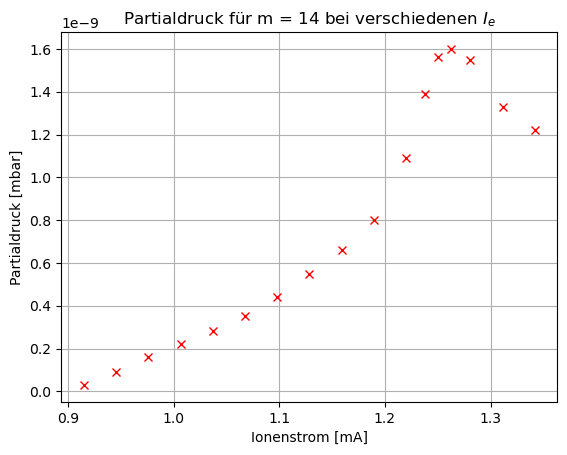

In [5]:
poti = np.array([11, 10.75, 10.5 , 10.35, 10.25 , 10.15 , 10.0 , 9.75 , 9.5 , 9.25 , 9.0 , 8.75 , 8.5 , 8.25 , 8.0 , 7.75 , 7.5])
p = np.array([ 1.22 , 1.33, 1.55 , 1.6 , 1.56 , 1.39 , 1.09 , 0.80 , 0.66 , 0.55 , 0.44 , 0.35 , 0.28 , 0.22 , 0.16 , 0.09 , 0.03]) * 10**-9

plt.plot(0.122 * poti, p, 'rx')

plt.title('Partialdruck für m = 14 bei verschiedenen $I_e$')
plt.xlabel('Ionenstrom [mA]')
plt.ylabel('Partialdruck [mbar]')
plt.grid()
plt.show()

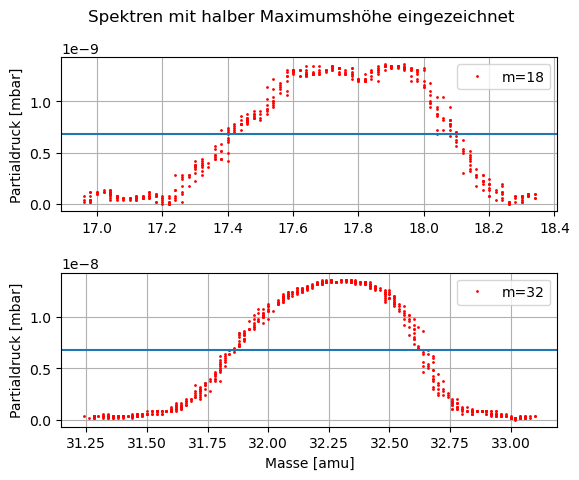

In [6]:
# Bestimmung des Auflösungsvermögens 
rm1 = m18_m[300:750]
rm2 = m32_m[400:1000]

rp1 = np.abs(m18_p)[300:750]
rp2 = np.abs(m32_p)[400:1000]

hmax1 = np.max(rp1) / 2
hmax2 = np.max(rp2) / 2

fig, ax = plt.subplots(2,1, gridspec_kw={'wspace':0.4,'hspace':0.4})

ax[0].plot(rm1, rp1, 'r.', markersize=2, label='m=18')
ax[1].plot(rm2, rp2, 'r.', markersize=2, label='m=32')

fig.suptitle('Spektren mit halber Maximumshöhe eingezeichnet')

ax[0].set(xlabel="", ylabel="Partialdruck [mbar]")
ax[1].set(xlabel="Masse [amu]", ylabel="Partialdruck [mbar]")

for i in [0,1]:
    ax[i].legend()
    ax[i].grid()

ax[0].axhline(hmax1)
ax[1].axhline(hmax2)
plt.show()

# Aufgabe 2: Argon

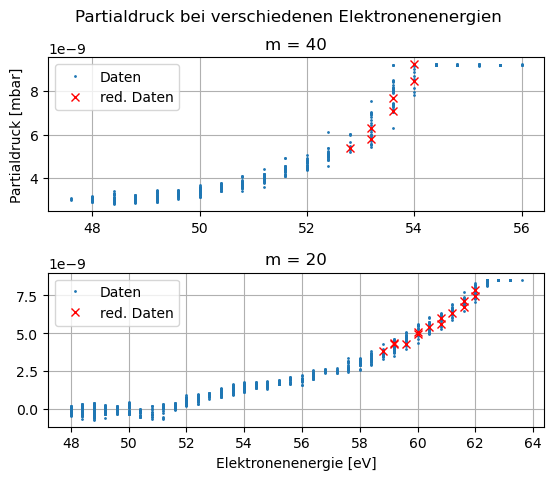

In [7]:
# plotting the argondata
ar40 = pd.read_csv('Data/Argon_MS40.CSV', skiprows=15)
ar40_U = - np.array(ar40['CH1'])[1400::] / 10
ar40_p = np.array(ar40['CH2'])[1400::] * 10 ** -10

dat40_U = ar40_U[375:-130:15]
dat40_p = ar40_p[375:-130:15]

ar20 = pd.read_csv('Data/Argon_MS20.CSV', skiprows=15)
ar20_U = - np.array(ar20['CH1'])[::] / 10
ar20_p = np.array(ar20['CH2'])[::] * 10 ** -10

dat20_U = ar20_U[1600:-120:20]
dat20_p = ar20_p[1600:-120:20]

fig, ax = plt.subplots(2,1, gridspec_kw={'wspace':0.4,'hspace':0.4})
fig.suptitle('Partialdruck bei verschiedenen Elektronenenergien')

ax[0].plot(ar40_U,ar40_p, '.', markersize=2, label='Daten')
ax[0].plot(dat40_U, dat40_p, 'rx', label='red. Daten')

ax[1].plot(ar20_U,ar20_p, '.', markersize=2, label='Daten')
ax[1].plot(dat20_U, dat20_p, 'rx', label='red. Daten')

for i in [0,1]:
    ax[i].legend()
    ax[i].grid()

ax[0].set(title='m = 40', xlabel='', ylabel='Partialdruck [mbar]')
ax[1].set(title='m = 20', xlabel='Elektronenenergie [eV]', ylabel='')

plt.show()

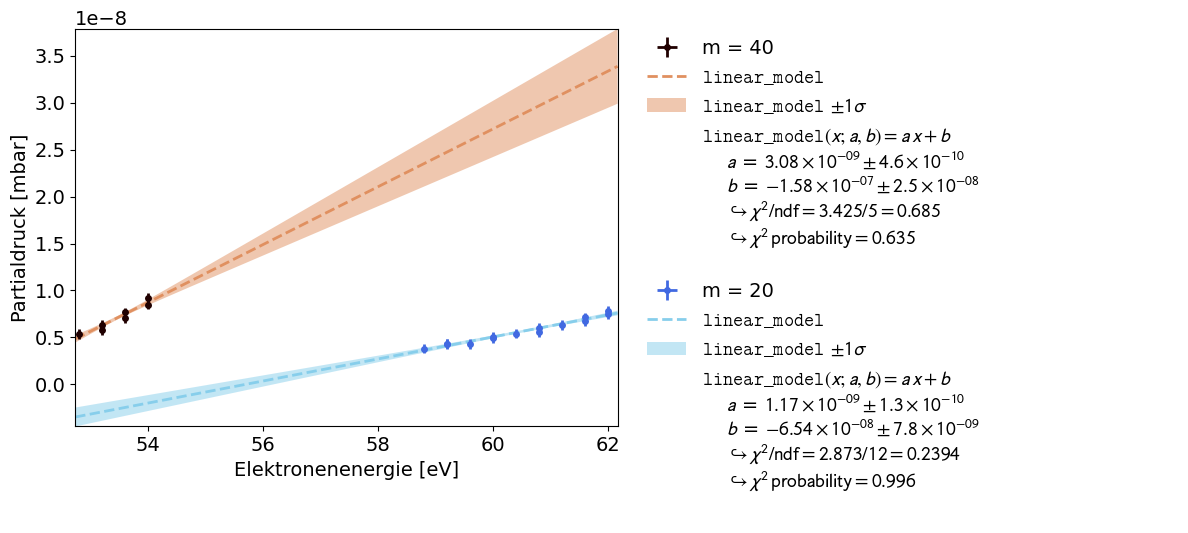

51+/-11 56+/-9


In [8]:
# bestimmung der Unsicherheiten 
sig_p = 0.5 * 10 ** -9
sig_U = 0

# definieren eines linearen Modells
def lin(x,m,b):
    return x * m + b

# fitten zweier linearer Fits
dat40 = XYContainer(dat40_U,dat40_p)
dat40.label = 'm = 40'
dat40.axis_labels = ('Elektronenenergie [eV]','Partialdruck [mbar]')
dat40.add_error('x', sig_U)
dat40.add_error('y', sig_p)

fit40 = XYFit(dat40)
fit40.do_fit()

dat20 = XYContainer(dat20_U,dat20_p)
dat20.label = 'm = 20'
dat20.axis_labels = ('Elektronenenergie [eV]','Partialdruck [mbar]')
dat20.add_error('x', sig_U)
dat20.add_error('y', sig_p)

fit20 = XYFit(dat20)
fit20.do_fit()

plot = Plot([fit40,fit20])
plot.plot()

plt.show()

# Berechnungen der Auftrittsenergien
m40, b40 = fit40.parameter_values
m40_err, b40_err = fit40.parameter_errors

m20, b20 = fit20.parameter_values
m20_err, b20_err = fit20.parameter_errors

m40 = ufloat(m40,m40_err)
b40 = ufloat(b40,b40_err)
m20 = ufloat(m20,m20_err)
b20 = ufloat(b20,b20_err)

# Berechnung der Auftrittsenergien
E40 = - b40 / m40
E20 = - b20 / m20

print(E40,E20)

# 3. Dissoziationsenergien Stickstoff 

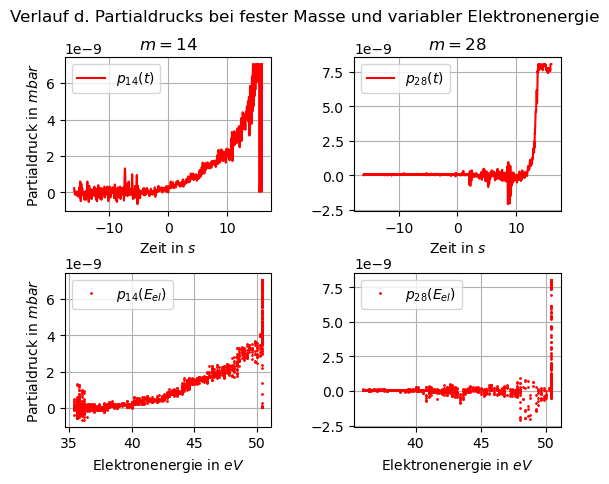

In [9]:
# Daten einlesen (Raumluft Stickstoff)
rln14_df = pd.read_csv("Data\\Raumluft_MS14(1).CSV", skiprows=15)
rln28_df = pd.read_csv("Data\\Raumluft_MS24.CSV", skiprows=15)

# Dataframes umwandeln in numpy arrays
rln14_ch1 = np.array([ rln14_df["CH1"] , rln14_df["CH2"] ])
rln14_time = np.array([rln14_df["TIME"] , rln14_df["CH2"]])
rln28_ch1 = np.array([ rln28_df["CH1"] , rln28_df["CH2"] ])
rln28_time = np.array([rln28_df["TIME"] , rln28_df["CH2"]])

# Plotte 2x2 fig
# linke Spalte: m=14
# rechte Spalte: m=28
# oben: CH2( TIME ) => Oszi
# unten: CH2( CH1 ) => Auswertung
fig3_1, ax3_1 = plt.subplots(2, 2, gridspec_kw={'wspace':0.4,'hspace':0.4})
# m=14
ax3_1[0][0].plot( rln14_time[0] , rln14_time[1] * 10**-10 , color="red" , label="$p_{14}(t)$" , markersize=2)
ax3_1[1][0].plot( -rln14_ch1[0]/10 , rln14_ch1[1] * 10**-10 , "r." , label="$p_{14}(E_{el})$" , markersize=2)
# m=28
ax3_1[0][1].plot( rln28_time[0] , rln28_time[1] * 10**-10 , color="red" , label="$p_{28}(t)$" , markersize=2)
ax3_1[1][1].plot( -rln28_ch1[0]/10 , rln28_ch1[1] * 10**-10 , "r." , label="$p_{28}(E_{el})$" , markersize=2)


# Grid und Legend für jeden subplot erstellen
for i in [0,1]:
    for j in [0,1]:
        ax3_1[i][j].grid(), ax3_1[i][j].legend()

# Achsenbeschriftung für alle subplots
ax3_1[0][0].set(xlabel="Zeit in $s$", ylabel="Partialdruck in $mbar$")
ax3_1[0][1].set(xlabel="Zeit in $s$", ylabel="")
ax3_1[1][0].set(xlabel="Elektronenergie in $eV$", ylabel="Partialdruck in $mbar$")
ax3_1[1][1].set(xlabel="Elektronenergie in $eV$", ylabel="")
ax3_1[0][0].set_title("$m=14$")
ax3_1[0][1].set_title("$m=28$")
fig3_1.suptitle("Verlauf d. Partialdrucks bei fester Masse und variabler Elektronenergie")

plt.show()

# 4 Quantitative Analyse

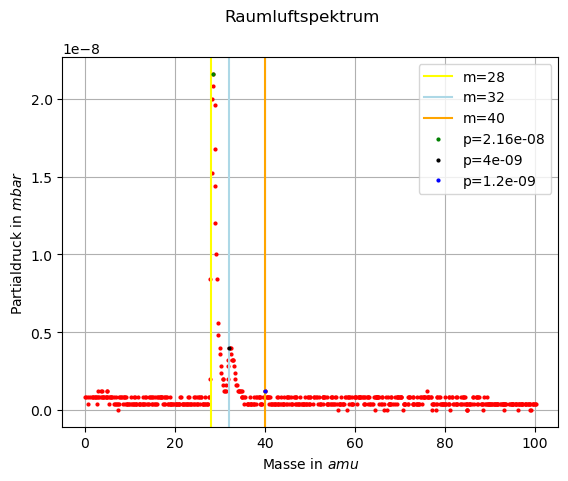

In [10]:
# Daten einlesen
rlsp1_df = pd.read_csv("Data\\Raumluft(1-50).CSV", skiprows=15)
rlsp2_df = pd.read_csv("Data\\Raumluft(50-100).CSV", skiprows=15)

# Dataframes umwandeln in numpy arrays
rlsp1 = np.array([ rlsp1_df["CH1"][240:1830]/2 , rlsp1_df["CH2"][240:1830] ])
rlsp2 = np.array([ rlsp2_df["CH1"][250:1840]/2 + 50 , rlsp2_df["CH2"][250:1840] ])

fig4_1, ax4_1 = plt.subplots()

# Raumluftspektrum
ax4_1.plot(rlsp1[0][::5] , rlsp1[1][::5] * 10**-9 , "r." , markersize=4)
ax4_1.plot(rlsp2[0][:313:5] , rlsp2[1][:313:5] * 10**-9 , "r." , markersize=4)
ax4_1.plot(rlsp2[0][313::5] , rlsp2[1][313::5] * 10**-9 , "r." , markersize=4)

# Plot schönmachen
ax4_1.grid()
ax4_1.set(xlabel="Masse in $amu$", ylabel="Partialdruck in $mbar$")
fig4_1.suptitle("Raumluftspektrum")

# Massenlinien
ax4_1.axvline(x=28, color="yellow", label="m=28")
ax4_1.axvline(x=32, color="lightblue", label="m=32")
ax4_1.axvline(x=40, color="orange", label="m=40")

# Die beiden höchsten Peaks, bei m=28 (N2) und m=32 (O2) für ungefähre Luftzusammensetzung
ax4_1.plot(rlsp1[0][867:868:5] , rlsp1[1][867:868:5] * 10**-9 , "g." , label=f"p={rlsp1[1][867:868:5][0] * 10**-9}" , markersize=4)
ax4_1.plot(rlsp1[0][985:986:5] , rlsp1[1][985:986:5] * 10**-9 , "k." , label=f"p={rlsp1[1][985:986:5][0] * 10**-9}" , markersize=4)
ax4_1.plot(rlsp1[0][1237:1238:5] , rlsp1[1][1237:1238:5] * 10**-9 , "b." , label=f"p={rlsp1[1][1237:1238:5][0] * 10**-9}" , markersize=4)
ax4_1.legend()
plt.show()

# 5 Qualitative Analyse

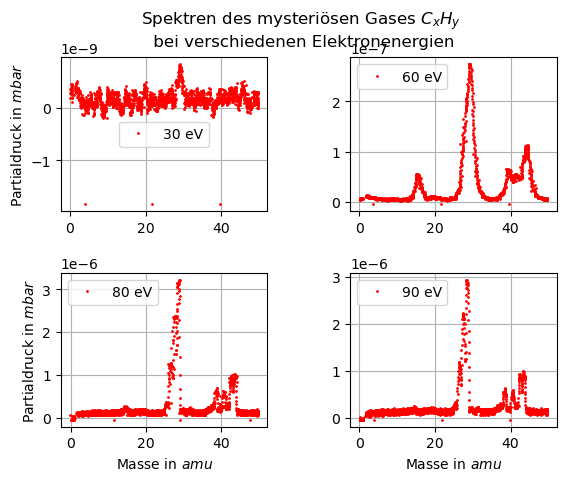

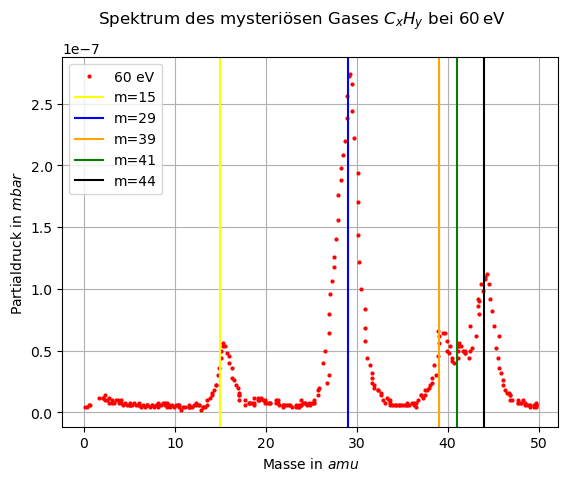

In [11]:
# Daten einlesen
propan30_df = pd.read_csv("Data\\Propan_E30.CSV", skiprows=15)
propan60_df = pd.read_csv("Data\\Propan_E60.CSV", skiprows=15)
propan80_df = pd.read_csv("Data\\Propan_E80.CSV", skiprows=15)
propan90_df = pd.read_csv("Data\\Propan_E90.CSV", skiprows=15)

# Dataframes umwandeln in numpy arrays
propan30 = np.array([ propan30_df["CH1"][250:1840]/2 , propan30_df["CH2"][250:1840] * 10**-9 ])
propan60 = np.array([ propan60_df["CH1"][170:1750]/2 , propan60_df["CH2"][170:1750] * 10**-8 ])
propan80 = np.array([ propan80_df["CH1"][120:1710]/2 , propan80_df["CH2"][120:1710] * 10**-7 ])
propan90 = np.array([ propan90_df["CH1"][140:1730]/2 , propan90_df["CH2"][140:1730] * 10**-7 ])

# erster Multiplot
fig5_1, ax5_1 = plt.subplots(2,2, gridspec_kw={'wspace':0.4,'hspace':0.4})
ax5_1[0][0].plot(propan30[0], propan30[1], "r.", label="30 eV", markersize=2)
ax5_1[0][1].plot(propan60[0], propan60[1], "r.", label="60 eV", markersize=2)
ax5_1[1][0].plot(propan80[0], propan80[1], "r.", label="80 eV", markersize=2)
ax5_1[1][1].plot(propan90[0], propan90[1], "r.", label="90 eV", markersize=2)

# Grid und Legend für jeden subplot erstellen
for i in [0,1]:
    for j in [0,1]:
        ax5_1[i][j].grid()
        ax5_1[i][j].legend()

# Achsenbeschriftung für alle subplots
ax5_1[0][0].set(xlabel="", ylabel="Partialdruck in $mbar$")
ax5_1[1][0].set(xlabel="Masse in $amu$", ylabel="Partialdruck in $mbar$")
ax5_1[1][1].set(xlabel="Masse in $amu$", ylabel="")
fig5_1.suptitle("Spektren des mysteriösen Gases $C_xH_y$ \n bei verschiedenen Elektronenergien")

# zweiter, großer Plot
fig5_2, ax5_2 = plt.subplots()
ax5_2.plot(propan60[0][::5], propan60[1][::5], "r.", label="60 eV", markersize=4)
ax5_2.grid()
ax5_2.set(xlabel="Masse in $amu$", ylabel="Partialdruck in $mbar$")
fig5_2.suptitle("Spektrum des mysteriösen Gases $C_xH_y$ bei $60\,\mathrm{eV}$")

# Massenlinien
ax5_2.axvline(x=15, color="yellow", label="m=15")
ax5_2.axvline(x=29, color="blue", label="m=29")
ax5_2.axvline(x=39, color="orange", label="m=39")
ax5_2.axvline(x=41, color="green", label="m=41")
ax5_2.axvline(x=44, color="black", label="m=44")
ax5_2.legend()

# Aufgabe 6: thermische Zersetzung

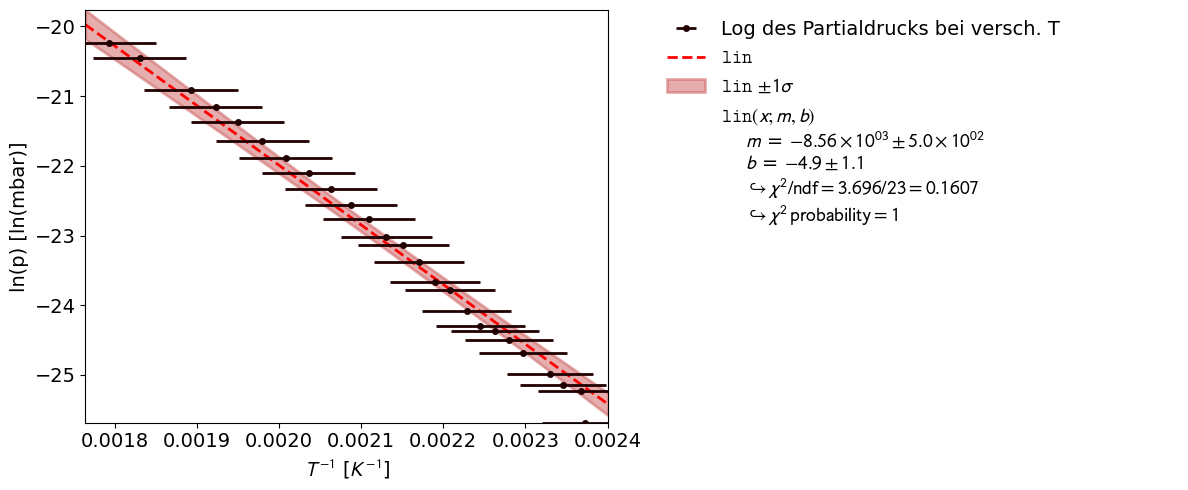

 H = (7.1+/-0.4)e+04


In [12]:
# defining the constants
R = 8.314

# defining the model 
def exp(x,C,H):
    return C * np.exp(-H/R * x)

# angefangen bei 5s, alle 5s
p = np.array([1.62, 1.30, 0.83, 0.65, 0.52, 0.40, 0.31, 0.25, 0.20, 0.16, 0.13, 0.1, 0.09, 0.07, 0.053, 0.047, 0.035, 0.028, 0.026, 0.023, 0.019, 0.014, 0.012, 0.011, 0.007]) * 10 ** -9
U = np.array([16.10, 15.46, 14.44, 13.97, 13.56, 13.12, 12.72, 12.33, 11.96, 11.64, 11.36, 11.1, 10.84, 10.61, 10.37, 10.16, 9.93, 9.74, 9.54, 9.35, 9.17, 8.82, 8.66, 8.44, 8.39])

T = ufloat(17.65, 1.1) * U + 273.5
Tinv = 1 / T

therm = XYContainer(unp.nominal_values(Tinv), unp.nominal_values(unp.log(p)))
therm.axis_labels = ('$T^{-1}$ [$K^{-1}$]','ln(p) [ln(mbar)]')
therm.label = 'Log des Partialdrucks bei versch. T'

therm.add_error('x', unp.std_devs(Tinv))
therm.add_error('y', unp.std_devs(unp.log(p)))

therm_fit = XYFit(therm, lin)
therm_fit.do_fit()

plot = Plot(therm_fit)

plot.customize('model_line', 'color', [(0, 'red')])
plot.customize('model_error_band', 'color', [(0, 'indianred')])

plot.plot()
plot.show()

# Ausgeben der Lösung
m = ufloat(therm_fit.parameter_values[0], therm_fit.parameter_errors[0])
print(f' H = {-m * R}')